 # Advanced Classification - Part 5 - Exercises with Results

## Exercise 1

#### Task 1 
##### Load libraries that are used in this module.

#### Result:

In [1]:
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from pathlib import Path

#### Task 2
##### Define the directory settings.
#### Result:

In [2]:
# Set 'main_dir' to location of the project folder
home_dir = Path(".").resolve()
main_dir = home_dir.parent.parent
print(main_dir)
data_dir = str(main_dir) + "/data"
print(data_dir)

/Users/aashika/Desktop/skillsoft-advanced-classification-2022
/Users/aashika/Desktop/skillsoft-advanced-classification-2022/data


#### Task 3
##### Set the working directory to `data_dir`.
##### Check if the working directory is updated to `data_dir`.

#### Result:

In [3]:
# Change the working directory.
os.chdir(data_dir)

# Check the working directory.
print(os.getcwd())

/Users/aashika/Desktop/skillsoft-advanced-classification-2022/data


#### Task 4

##### Load the pickle  `bank_clean.sav` that we saved from last time and save it as `bank`.
##### View the first few rows and column names of `bank`.

#### Result:

In [4]:
bank = pickle.load(open("bank_clean.sav","rb"))

In [5]:
bank.head()

,age,campaign,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
35577,32,1,-1.8,92.893,-46.2,1.244,5099,0
13950,33,2,1.4,93.918,-42.7,4.963,5228,0
29451,25,5,-1.8,93.075,-47.1,1.405,5099,1
32295,34,1,-1.8,92.893,-46.2,1.313,5099,0
27477,53,7,-0.1,93.200,-42.0,4.021,5196,0


In [6]:
bank.columns

Index(['age', 'campaign', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx',
       'euribor3m', 'nr_employed', 'y'],
      dtype='object')

#### Task 5
##### Select the predictors by dropping variable `y` and save the result to a dataframe `X_ex`.
##### Save the target variable `y` column to `y_ex` variable.
##### Set seed as 1.
##### Split the data into train and test sets and save respective variables to `X_train_ex`, `X_test_ex`,  `y_train_ex`,  `y_test_ex`.

#### Result:

In [7]:
# Select the predictors and target.
X_ex = bank.drop(['y'], axis = 1)
y_ex = np.array(bank['y'])

# Set the seed to 1.
np.random.seed(1)

# Split into training and test sets.
X_train_ex, X_test_ex, y_train_ex, y_test_ex = train_test_split(X_ex, y_ex, test_size = 0.3)

#### Task 6
##### Create an SVC classifier and save as `ex_svclassifier`.
##### Train the model using `X_train_ex` and `y_train_ex`.

#### Result:

In [8]:
ex_svclassifier = SVC(kernel = 'linear',
                     probability = True)

In [9]:
ex_svclassifier.fit(X_train_ex, y_train_ex)

SVC(kernel='linear', probability=True)

#### Task 7

##### Using the trained model, predict on the test dataset. 
##### Save the prediction as `ex_svc_y_predict`.
##### Save the prediction probabilities as `ex_svc_y_predict_prob`.
##### Print the first five rows of the prediction and prediction probabilities.


#### Result:

In [10]:
# Predict on the test dataset.
ex_svc_y_predict = ex_svclassifier.predict(X_test_ex)
ex_svc_y_predict[0:5]

array([0, 0, 0, 0, 0])

In [11]:
#Predict on test, but instead of labels 
# we will get probabilities for class 0 and 1.
ex_svc_y_predict_prob = ex_svclassifier.predict_proba(X_test_ex) 
print(ex_svc_y_predict_prob[5:])

[[0.79973572 0.20026428]
 [0.86807562 0.13192438]
 [0.89499706 0.10500294]
 ...
 [0.89416297 0.10583703]
 [0.88201308 0.11798692]
 [0.87594349 0.12405651]]


#### Task 8

##### We've summarized all the metrics into the function `get_performance_scores()` below. 
##### Compute the metrics of our svc model and save as `ex_svc_scores` and print results.

#### Result:

In [12]:
def get_performance_scores(y_test, y_predict, y_predict_prob, eps=1e-15, beta=0.5):
    
    from sklearn import metrics
    
    # Scores keys.
    metric_keys = ["accuracy", "precision", "recall", "f1", "fbeta", "log_loss", "AUC"]
    
    # Score values.
    metric_values = [None]*len(metric_keys)
    
    metric_values[0] = metrics.accuracy_score(y_test, y_predict)
    metric_values[1] = metrics.precision_score(y_test, y_predict)
    metric_values[2] = metrics.recall_score(y_test, y_predict)
    metric_values[3] = metrics.f1_score(y_test, y_predict)
    metric_values[4] = metrics.fbeta_score(y_test, y_predict, beta=beta)
    metric_values[5] = metrics.log_loss(y_test, y_predict_prob[:, 1], eps=eps)
    metric_values[6] = metrics.roc_auc_score(y_test, y_predict_prob[:, 1])
    
    perf_metrics = dict(zip(metric_keys, metric_values))
    
    return(perf_metrics)


In [13]:
ex_svc_scores = get_performance_scores(y_test_ex, ex_svc_y_predict, ex_svc_y_predict_prob)
print(ex_svc_scores)

{'accuracy': 0.87, 'precision': 0.3333333333333333, 'recall': 0.0684931506849315, 'f1': 0.11363636363636363, 'fbeta': 0.18796992481203006, 'log_loss': 0.35663959180768584, 'AUC': 0.6554417613267136}


#### Task 9

##### Save the precision-recall curve of the svc model  in `ex_svc_prec_recall`. Set parameters as shown in class.
##### Plot the curves.

#### Result:

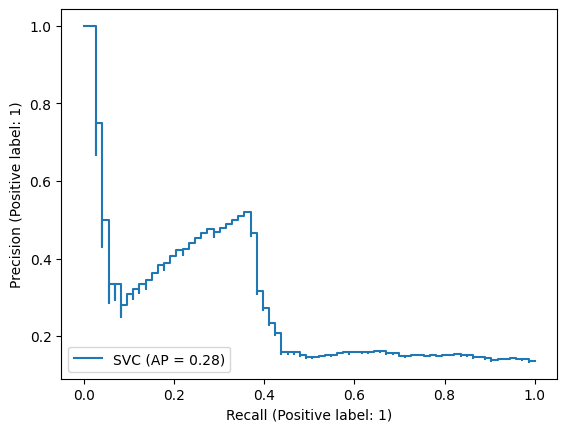

In [14]:
ex_svc_prec_recall = metrics.plot_precision_recall_curve(ex_svclassifier, 
                               X_test_ex, y_test_ex, 
                               name = "SVC")
plt.show()

#### Task 10

##### Similar to above, plot the ROC curve of the svc model.
##### Save the curve as `ex_svc_roc`.

#### Result:

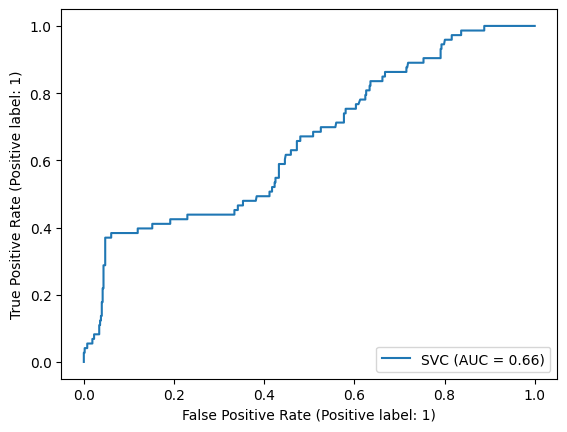

In [15]:
ex_svc_roc = metrics.plot_roc_curve(ex_svclassifier,
                                X_test_ex,
                                y_test_ex,
                                name = "SVC")
plt.show()

#### Task 11

##### Load the `metrics_gbm_ex.sav` pickle from the previous exercises from your `data_dir`.
##### Save it as `metrics_svm_ex` 
##### Update `metrics_svm_ex` with the SVC scores `ex_svc_scores`. Print results.

#### Result:

In [16]:
# Load ensemble method metrics
metrics_svm_ex = pickle.load(open("metrics_gbm_ex.sav","rb"))

In [17]:
# Add the model to our dataframe.
metrics_svm_ex.update({"SVC": ex_svc_scores})
print(metrics_svm_ex)

{'RF': {'accuracy': 0.8716666666666667, 'precision': 0.4411764705882353, 'recall': 0.2054794520547945, 'f1': 0.2803738317757009, 'fbeta': 0.3588516746411483, 'log_loss': 1.0075494584661249, 'AUC': 0.7337734917210366}, 'Optimized RF': {'accuracy': 0.8933333333333333, 'precision': 0.7142857142857143, 'recall': 0.2054794520547945, 'f1': 0.3191489361702127, 'fbeta': 0.4777070063694268, 'log_loss': 0.31929555370400753, 'AUC': 0.7813287931168932}, 'GBM': {'accuracy': 0.895, 'precision': 0.7083333333333334, 'recall': 0.2328767123287671, 'f1': 0.3505154639175258, 'fbeta': 0.5029585798816569, 'log_loss': 0.30041312491642347, 'AUC': 0.7918172129656105}, 'Optimized GBM': {'accuracy': 0.8816666666666667, 'precision': 0.5714285714285714, 'recall': 0.1095890410958904, 'f1': 0.1839080459770115, 'fbeta': 0.3100775193798449, 'log_loss': 0.3196653331095461, 'AUC': 0.7571287463284032}, 'SVC': {'accuracy': 0.87, 'precision': 0.3333333333333333, 'recall': 0.0684931506849315, 'f1': 0.11363636363636363, 'fbe